In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [3]:
df=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\Apple\\AAPL(ClosingVal-today).csv")

In [4]:
df.head()

,Date,Open,High,Low,Volume,Close
0,1/2/1998,0.121652,0.145089,0.120536,718110400,0.145089
1,1/5/1998,0.147321,0.147879,0.135603,651873600,0.141741
2,1/6/1998,0.142299,0.178571,0.131696,1812473600,0.169085
3,1/7/1998,0.167969,0.169643,0.154576,1041622400,0.156250
4,1/8/1998,0.155692,0.166295,0.151228,774020800,0.162388


In [5]:
df.tail()

,Date,Open,High,Low,Volume,Close
5840,3/19/2021,119.900002,121.430000,119.680000,185023200,119.989998
5841,3/22/2021,120.330002,123.870003,120.260002,111912300,123.389999
5842,3/23/2021,123.330002,124.239998,122.139999,95467100,122.540001
5843,3/24/2021,122.820000,122.900002,120.070000,88530500,120.089996
5844,3/25/2021,119.540001,121.660004,119.000000,98696600,120.589996


In [6]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [7]:
df.shape

(5845, 6)

In [8]:
del df['Date']

In [9]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=250)

In [11]:
xtrain.shape

(4676, 4)

In [12]:
ytrain.shape

(4676,)

In [13]:
xtest.shape

(1169, 4)

In [14]:
ytest.shape

(1169,)

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [17]:
rf_predictions = rf.predict(xtest)
rf_predictions

array([ 5.46844659, 43.621125  ,  0.25691103, ...,  1.0958242 ,
        0.33986159, 46.09274937])

In [18]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [19]:
def MAPE(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Absolute Percentage Error """
    mape = np.mean(np.abs((ytest - predicted)/ytest))*100
    return mape

In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_predictions))
print('Mean r2 score:', metrics.r2_score(ytest, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_predictions)))
print('Mean Directional Accuracy:', mda(ytest, rf_predictions))
print ('Mean Absolute Percentage Error:', MAPE(ytest,rf_predictions))

a = metrics.mean_absolute_error(ytest, rf_predictions)
b = metrics.mean_squared_error(ytest, rf_predictions)
c = np.sqrt(metrics.mean_squared_error(ytest, rf_predictions))
d = mda(ytest, rf_predictions)
e = MAPE(ytest,rf_predictions)
f= metrics.r2_score(ytest, rf_predictions)

print('%.2f'%a)
print('%.2f'%f)
print('%.2f'%b)
print('%.2f'%c)
print('%.2f'%d)
print('%.2f'%e)


Mean Absolute Error: 0.12487308767322577
Mean r2 score: 0.9997831811186901
Mean Squared Error: 0.14024645562023993
Root Mean Squared Error: 0.37449493403815215
Mean Directional Accuracy: 0.9982876712328768
Mean Absolute Percentage Error: 0.8970920363143224
0.12
1.00
0.14
0.37
1.00
0.90


### Predicting for 6th April

In [21]:
rf.predict([[126.5,127.13,125.65,79463200]])

array([126.02752478])

### Graph

In [22]:
import matplotlib.pyplot as plt

In [23]:
newdf=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\Apple\\Apple(DataFrom26March)-Today.csv")

In [24]:
newdf.head()

,Date,Open,High,Low,Volume,Close
0,26-Mar-21,120.349998,121.480003,118.919998,93958900,121.209999
1,29-Mar-21,121.650002,122.580002,120.730003,80819200,121.389999
2,30-Mar-21,120.110001,120.400002,118.860001,85671900,119.900002
3,31-Mar-21,121.650002,123.519997,121.150002,118323800,122.150002
4,1-Apr-21,123.660004,124.180000,122.489998,74957400,123.000000


In [25]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [41]:
predictions = rf.predict(newxval)
# print(list(newdf['Date']))
# print(list(newdf['Close']))
predictions

array([120.11729858, 122.00160172, 119.53899973, 122.63510073,
       124.37897466, 124.96407483, 126.02752478, 127.13109946,
       128.87400063])

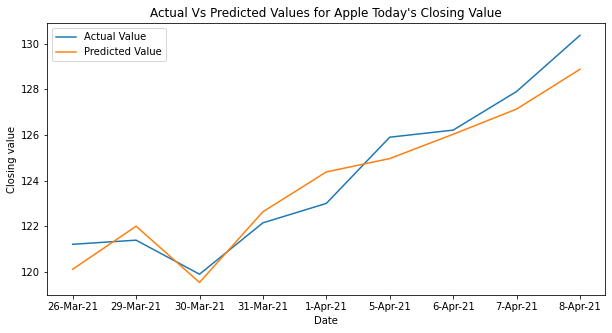

In [27]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Today's Closing Value")
plt.legend()

In [28]:
# save_results_to = 'C:/Users/Purushoth/Desktop/Results/'
plt.savefig('image.png', dpi = 300, bbox_inches='tight')
print('image saved.')

image saved.


<Figure size 432x288 with 0 Axes>

In [ ]:
# amount = list()
#     for col in df.columns:
#         val = list(df[col])
#         for v in val:
#             amount.append(v)





# XGBoost


In [25]:
from xgboost import XGBRegressor

In [27]:
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)

[17:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [28]:
xgb_predictions = xgb.predict(xtest)
xgb_predictions

array([112.48982   ,  90.58056   ,   3.3321908 , ..., 113.99225   ,
        25.036018  ,   0.27520907], dtype=float32)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, xgb_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, xgb_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, xgb_predictions)))
print('Mean Directional Accuracy:', mda(ytest, xgb_predictions))
print('Mean r2 score:', metrics.r2_score(ytest, xgb_predictions))

Mean Absolute Error: 0.18342306662899696
Mean Squared Error: 0.14079590294521047
Root Mean Squared Error: 0.37522780140230877
Mean Directional Accuracy: 0.990582191780822
Mean r2 score: 0.9998083672744675


# SVM


In [30]:
from sklearn.svm import SVR

In [31]:
svm = SVR()
svm.fit(xtrain,ytrain)

SVR()

In [32]:
svm_predictions = svm.predict(xtest)
svm_predictions

array([21.74756253, 31.26282736,  1.86433685, ..., 29.29624447,
        8.95506838, 32.70482217])

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, svm_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, svm_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, svm_predictions)))
print('Mean Directional Accuracy:', mda(ytest, svm_predictions))
print('Mean r2 score:', metrics.r2_score(ytest, svm_predictions))

Mean Absolute Error: 12.315709077216097
Mean Squared Error: 479.7755930547774
Root Mean Squared Error: 21.903780337073723
Mean Directional Accuracy: 0.6309931506849316
Mean r2 score: 0.3469930401538345
